<a href="https://colab.research.google.com/github/sudama-Inc/Data-Augmentation/blob/main/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 7s 0us/step


In [3]:
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [4]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('/root/.keras/datasets/flower_photos/roses/5060536705_b370a5c543_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/4675532860_890504a4a3_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/2414954629_3708a1a04d.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/14154164774_3b39d36778.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/19153732586_9de58c8f53_n.jpg')]

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [6]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('/root/.keras/datasets/flower_photos/roses/5060536705_b370a5c543_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/4675532860_890504a4a3_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/2414954629_3708a1a04d.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/14154164774_3b39d36778.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/19153732586_9de58c8f53_n.jpg')]

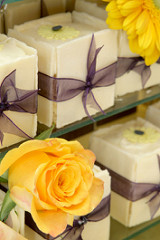

In [7]:
PIL.Image.open(str(roses[1]))

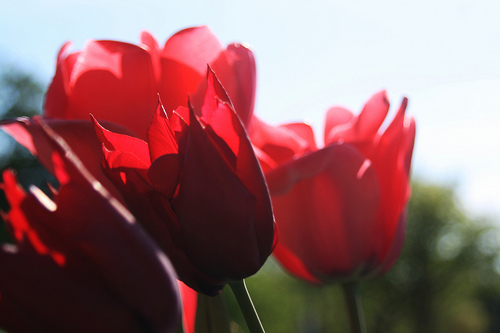

In [8]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [9]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [10]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [11]:
str(flowers_images_dict['roses'][0])

'/root/.keras/datasets/flower_photos/roses/5060536705_b370a5c543_n.jpg'

In [12]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [13]:
img.shape

(240, 320, 3)

In [14]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [15]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [16]:
X = np.array(X)
y = np.array(y)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [18]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [19]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 15s 45ms/step - loss: 1.4042 - accuracy: 0.4241
Epoch 2/30
86/86 [==============================] - 4s 45ms/step - loss: 1.0142 - accuracy: 0.5941
Epoch 3/30
86/86 [==============================] - 4s 46ms/step - loss: 0.8462 - accuracy: 0.6817
Epoch 4/30
86/86 [==============================] - 4s 46ms/step - loss: 0.6655 - accuracy: 0.7536
Epoch 5/30
86/86 [==============================] - 4s 46ms/step - loss: 0.4626 - accuracy: 0.8350
Epoch 6/30
86/86 [==============================] - 4s 45ms/step - loss: 0.2884 - accuracy: 0.9052
Epoch 7/30
86/86 [==============================] - 4s 45ms/step - loss: 0.1881 - accuracy: 0.9411
Epoch 8/30
86/86 [==============================] - 4s 45ms/step - loss: 0.1087 - accuracy: 0.9677
Epoch 9/30
86/86 [==============================] - 4s 45ms/step - loss: 0.0773 - accuracy: 0.9746
Epoch 10/30
86/86 [==============================] - 4s 45ms/step - loss: 0.0317 - accuracy: 0.9920
Epoch 11

In [20]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 30ms/step - loss: 2.7462 - accuracy: 0.6187


[2.7461509704589844, 0.6187363862991333]

**As we see train and test accuracy so, can model is overfitted**

**Apply Data Augmentation**

In [21]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

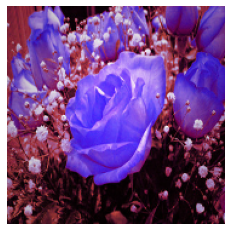

In [22]:
plt.axis('off')
plt.imshow(X[0])

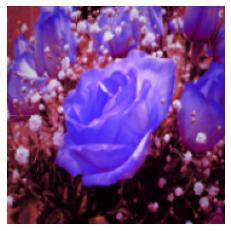

In [23]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [24]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 6s 55ms/step - loss: 1.3188 - accuracy: 0.4193
Epoch 2/30
86/86 [==============================] - 5s 57ms/step - loss: 1.0549 - accuracy: 0.5654
Epoch 3/30
86/86 [==============================] - 5s 55ms/step - loss: 0.9371 - accuracy: 0.6294
Epoch 4/30
86/86 [==============================] - 5s 54ms/step - loss: 0.8734 - accuracy: 0.6664
Epoch 5/30
86/86 [==============================] - 5s 54ms/step - loss: 0.8175 - accuracy: 0.6890
Epoch 6/30
86/86 [==============================] - 5s 55ms/step - loss: 0.7784 - accuracy: 0.7035
Epoch 7/30
86/86 [==============================] - 5s 54ms/step - loss: 0.7261 - accuracy: 0.7275
Epoch 8/30
86/86 [==============================] - 5s 54ms/step - loss: 0.7029 - accuracy: 0.7293
Epoch 9/30
86/86 [==============================] - 5s 54ms/step - loss: 0.6740 - accuracy: 0.7456
Epoch 10/30
86/86 [==============================] - 5s 54ms/step - loss: 0.6341 - accuracy: 0.7627
Epoch 11/

In [25]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 24ms/step - loss: 0.6954 - accuracy: 0.7898


[0.6953709125518799, 0.7897603511810303]